In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import tools
from pylab import *
import matplotlib.animation as animation
import matplotlib as mpl
import numpy as np
import os
import standard.analysis as sa
import tools
import matplotlib.pyplot as plt
import task
import tensorflow as tf
from model import FullModel
 
mpl.rcParams['font.size'] = 30
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['image.cmap']='jet'

%matplotlib inline

C:\Users\Peter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
path = 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50'
x = tools.load_all_results(path, argLast=True)



['files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000000', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000001', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000002', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000003', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000004', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000005', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000006', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000007', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000008', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000009', 'files/cluster_parameterize_K_vary_initial_K/clus

In [3]:
x.keys()

dict_keys(['w_bins', 'lin_bins', 'epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc', 'K', 'NOISE_MODEL', 'N_CLASS', 'N_KC', 'N_ORN', 'N_ORN_DUPLICATION', 'N_PN', 'ORN_NOISE_STD', 'batch_size', 'combinatorial_density', 'data_dir', 'dataset', 'direct_glo', 'distort_input', 'extra_layer', 'extra_layer_neurons', 'hallem_path', 'has_special_odors', 'initial_K', 'initial_pn2kc', 'initializer_or2orn', 'initializer_orn2pn', 'initializer_pn2kc', 'kc_bias', 'kc_dropout', 'kc_dropout_rate', 'kc_inputs', 'kc_loss', 'kc_loss_alpha', 'kc_loss_beta', 'kc_noise', 'kc_noise_std', 'kc_norm_post', 'kc_norm_pre', 'label_type', 'lr', 'mask_orn_activation_column', 'mask_orn_activation_row', 'max_epoch', 'mean_subtract_pn2kc', 'model', 'n_class_valence', 'n_combinatorial_classes', 'n_proto_valence', 'n_train', 'n_trueclass', 'n_val', 'or2orn_normalization', 'or_bias', 'oracle_scale', 'orn_dropout', 'orn_dropout_rate', 'orn_norm', 'output_bias', 'path', 'percent_generalization', 'pn_dropout', 'pn_dropo

In [4]:
x['train_acc']

array([0.8125    , 0.80078125, 0.7890625 , 0.08203125, 0.87890625,
       0.83984375, 0.0546875 , 0.87890625, 0.86328125, 0.8359375 ,
       0.828125  , 0.8515625 , 0.84765625, 0.859375  , 0.8828125 ,
       0.9375    , 0.859375  , 0.87109375, 0.87109375, 0.79296875,
       0.78125   , 0.9140625 , 0.875     , 0.84375   , 0.89453125,
       0.91015625, 0.8984375 , 0.84375   , 0.84375   , 0.8203125 ,
       0.85546875, 0.8671875 , 0.87109375, 0.8828125 , 0.875     ,
       0.9296875 , 0.78515625, 0.80078125, 0.8125    , 0.875     ,
       0.84375   , 0.85546875, 0.87890625, 0.89453125, 0.90234375,
       0.79296875, 0.7890625 , 0.7890625 , 0.8359375 , 0.83984375,
       0.84375   , 0.8828125 , 0.8515625 , 0.8984375 ], dtype=float32)

In [5]:
x['lr']

array([3.e-03, 3.e-03, 3.e-03, 3.e-03, 3.e-03, 3.e-03, 3.e-03, 3.e-03,
       3.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03,
       1.e-03, 1.e-03, 3.e-04, 3.e-04, 3.e-04, 3.e-04, 3.e-04, 3.e-04,
       3.e-04, 3.e-04, 3.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 3.e-05, 3.e-05, 3.e-05, 3.e-05,
       3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05])

In [6]:
x['N_KC']

array([ 2500,  2500,  2500,  5000,  5000,  5000, 10000, 10000, 10000,
        2500,  2500,  2500,  5000,  5000,  5000, 10000, 10000, 10000,
        2500,  2500,  2500,  5000,  5000,  5000, 10000, 10000, 10000,
        2500,  2500,  2500,  5000,  5000,  5000, 10000, 10000, 10000,
        2500,  2500,  2500,  5000,  5000,  5000, 10000, 10000, 10000,
        2500,  2500,  2500,  5000,  5000,  5000, 10000, 10000, 10000])

In [7]:
sparsity = np.array([y.mean() for y in x['sparsity']])
badKC = np.array([np.sum(y == 0)/y.size for y in x['sparsity']])
accuracy = x['train_acc']
histogram = x['log_hist']
linehist = x['hist']
threshold = x['thres']
lrs = x['lr']
nkcs = x['N_KC']
loss = x['train_loss']
logloss = np.log(loss)

In [8]:
x['K']

array([ 12.067806 ,  12.016974 ,  11.988506 , 139.7157   ,  13.496393 ,
        13.2609825, 138.84564  ,  13.973449 ,  13.28716  ,   9.135727 ,
         8.485662 ,   8.047054 ,  12.059942 ,  11.299133 ,  10.791716 ,
        14.323494 ,  13.276686 ,  12.442126 ,   7.466168 ,   5.5665364,
         3.0394788,   9.625292 ,   7.800049 ,   6.3466682,  12.150715 ,
        10.160642 ,   8.741721 ,   6.73251  ,   4.4313765,   0.5733335,
         8.588561 ,   6.287124 ,   3.7794824,  10.726262 ,   8.222849 ,
         5.6263914,   7.4189587,   4.636888 ,   0.5090898,   9.179172 ,
         6.3523164,   2.8082197,  11.144071 ,   7.957541 ,   4.708736 ,
        10.377655 ,   5.4879327,   0.6108758,  11.968212 ,   7.3571243,
         2.9166007,  14.079663 ,   9.189008 ,   4.8251286], dtype=float32)

In [9]:
x['K'][::4]

array([12.067806 , 13.496393 , 13.28716  , 12.059942 , 13.276686 ,
        3.0394788, 12.150715 ,  4.4313765,  3.7794824,  7.4189587,
        6.3523164,  4.708736 , 11.968212 ,  9.189008 ], dtype=float32)

In [10]:
ind = np.logical_and(x['train_acc'] > 0.7, x['initial_K'] == 50)

In [11]:
x['K'][ind].mean()

10.440263

In [12]:
x['K'][ind]

array([12.067806 ,  9.135727 , 12.059942 , 14.323494 ,  7.466168 ,
        9.625292 , 12.150715 ,  6.73251  ,  8.588561 , 10.726262 ,
        7.4189587,  9.179172 , 11.144071 , 10.377655 , 11.968212 ,
       14.079663 ], dtype=float32)

In [13]:
lr_labels, lrs = np.unique(x['lr'][ind], return_inverse=True)
kc_labels, nkcs = np.unique(x['N_KC'][ind], return_inverse=True)
z_acc = x['train_acc'][ind]
z_K = x['K'][ind]

In [14]:
lrs

array([5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0], dtype=int64)

In [15]:
def func(X, Y, Z, ind, vrange):
    lr_labels, lrs = np.unique(x[X][ind], return_inverse=True)
    kc_labels, nkcs = np.unique(x[Y][ind], return_inverse=True)
    z = x[Z][ind]

    im_acc = np.zeros((len(lr_labels), len(kc_labels)))
    for i, acc in enumerate(z):
            im_acc[lrs[i], nkcs[i]] = z[i] 
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    im = plt.imshow(im_acc, vmin=vrange[0],vmax=vrange[1])
    ax = plt.gca()
    for i in range(im_acc.shape[0]):
        for j in range(im_acc.shape[1]):
            c = im_acc[i,j]
            ax.text(j, i, str(np.round(c,2)), va='center', ha='center', fontsize=15)
    divider = make_axes_locatable(ax)
    plt.xticks(np.arange(len(kc_labels)),kc_labels, fontsize=15)
    plt.yticks(np.arange(len(lr_labels)),lr_labels,fontsize=15)
    plt.ylim([-.5,lr_labels.shape[0]-.5])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=15)
        

In [16]:
def g(ind):
    f, axs = plt.subplots(1,2,figsize=(8,8))
    plt.sca(axs[0])
    func('lr', 'N_KC', 'train_acc', ind, vrange=[.3, 1])
    plt.title('accuracy', fontsize=15)
    plt.sca(axs[1])
    func('lr', 'N_KC', 'K', ind, vrange=[0, 15])
    plt.title('K', fontsize=15)

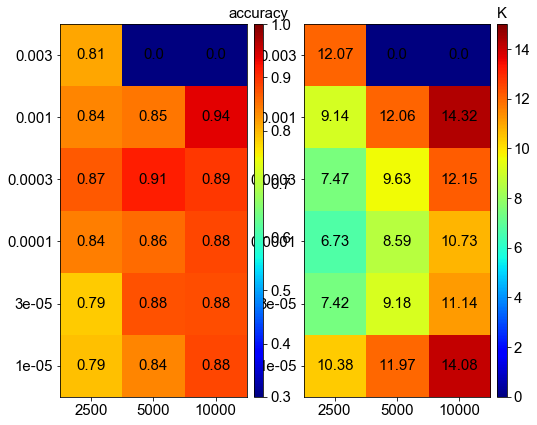

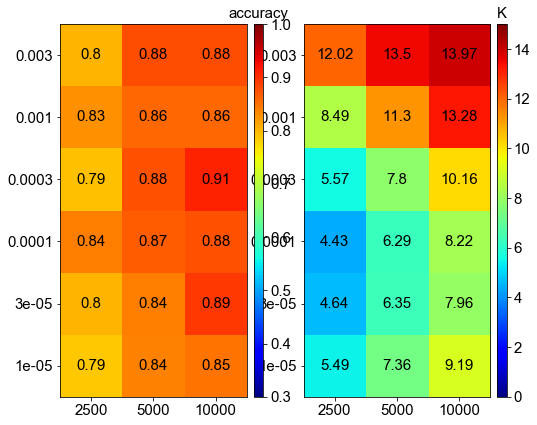

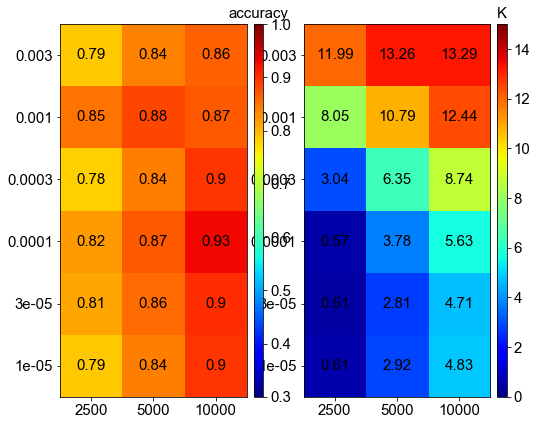

In [25]:
ind_hi = np.logical_and(x['train_acc'] > 0.7, x['initial_K'] == 50)
ind_med = np.logical_and(x['train_acc'] > 0.7, x['initial_K'] == 25)
ind_lo = np.logical_and(x['train_acc'] > 0.7, x['initial_K'] == 12.5)

g(ind_hi)
g(ind_med)
g(ind_lo)

In [18]:
x['train_acc']

array([0.8125    , 0.80078125, 0.7890625 , 0.08203125, 0.87890625,
       0.83984375, 0.0546875 , 0.87890625, 0.86328125, 0.8359375 ,
       0.828125  , 0.8515625 , 0.84765625, 0.859375  , 0.8828125 ,
       0.9375    , 0.859375  , 0.87109375, 0.87109375, 0.79296875,
       0.78125   , 0.9140625 , 0.875     , 0.84375   , 0.89453125,
       0.91015625, 0.8984375 , 0.84375   , 0.84375   , 0.8203125 ,
       0.85546875, 0.8671875 , 0.87109375, 0.8828125 , 0.875     ,
       0.9296875 , 0.78515625, 0.80078125, 0.8125    , 0.875     ,
       0.84375   , 0.85546875, 0.87890625, 0.89453125, 0.90234375,
       0.79296875, 0.7890625 , 0.7890625 , 0.8359375 , 0.83984375,
       0.84375   , 0.8828125 , 0.8515625 , 0.8984375 ], dtype=float32)

In [19]:
x['initial_K']

array([50. , 25. , 12.5, 50. , 25. , 12.5, 50. , 25. , 12.5, 50. , 25. ,
       12.5, 50. , 25. , 12.5, 50. , 25. , 12.5, 50. , 25. , 12.5, 50. ,
       25. , 12.5, 50. , 25. , 12.5, 50. , 25. , 12.5, 50. , 25. , 12.5,
       50. , 25. , 12.5, 50. , 25. , 12.5, 50. , 25. , 12.5, 50. , 25. ,
       12.5, 50. , 25. , 12.5, 50. , 25. , 12.5, 50. , 25. , 12.5])

In [20]:
log = tools.load_all_results(path, argLast=False)

['files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000000', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000001', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000002', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000003', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000004', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000005', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000006', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000007', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000008', 'files/cluster_parameterize_K_vary_initial_K/cluster_parameterize_K_vary_initial_K50\\000009', 'files/cluster_parameterize_K_vary_initial_K/clus

C:\Users\Peter\PycharmProjects\olfaction_evolution\tools.py:220: RuntimeWarning: divide by zero encountered in log
  res['train_logloss'] = np.log(res['train_loss'])


In [21]:
ind = np.logical_and(log['initial_K'] > 1, x['train_acc'] > .8)

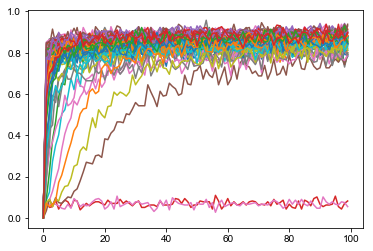

In [22]:
plt.plot(log['train_acc'].T)

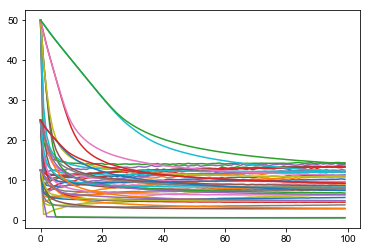

In [26]:
plt.plot(log['K'][ind].T)

In [24]:
x['K'][ind].mean()

8.730116